# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
dim = (128, 128)

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * dim[0])

# Seed
seed = 42

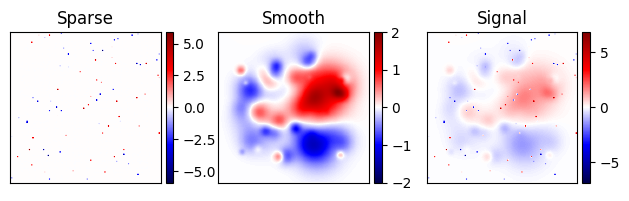

In [4]:
sparse_signal = compute_sparse(dim, sparse_range, density, seed)
smooth_signal = compute_smooth(dim, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal
plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(dim, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50 # 10, 20 0.05 - 0.1  pour lambda 1
y = compute_y(y0, psnr)

# Solver

In [11]:
from pyxu.operator import Laplacian

# Loss weights
lambda1 = 0
lambda2 = 1000

coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, Laplacian(dim))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-10-29 21:29:39.580376] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-10-29 21:29:55.889415] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.003465525030371993
INFO -- [2023-10-29 21:30:12.134574] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.0017441169391216697
INFO -- [2023-10-29 21:30:28.189102] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.0011010854086771166
INFO -- [2023-10-29 21:30:44.546294] Iteration 2_000
	iteration: 2000
	N_iter: 2001.0
	RelError[x]: 0.0007527887983498782
INFO -- [2023-10-29 21:31:00.215094] Iteration 2_500
	iteration: 2500
	N_iter: 2501.0
	RelError[x]: 0.0005308727678335551
INFO -- [2023-10-29 21:31:17.122892] Iteration 3_000
	iteration: 3000
	N_iter: 3001.0
	RelError[x]: 0.00037763138033630354
INFO -- [2023-10-29 21:31:32.999865] Iteration 3_500
	iteration: 3500
	N_iter: 3501.0
	RelError[x]: 0.0002680636446918173
INFO -- [2023-10-29 21:31:48.797845] Iteration 4_000
	it

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x14f5589a0>


In [1]:
from os import listdir
from os.path import isfile, join
mypath ="exps/128x128/L_10%/psnr_50/coupled"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

lambda1 = float(onlyfiles[1][3:10])
lambda2 = float(onlyfiles[1][14:21])

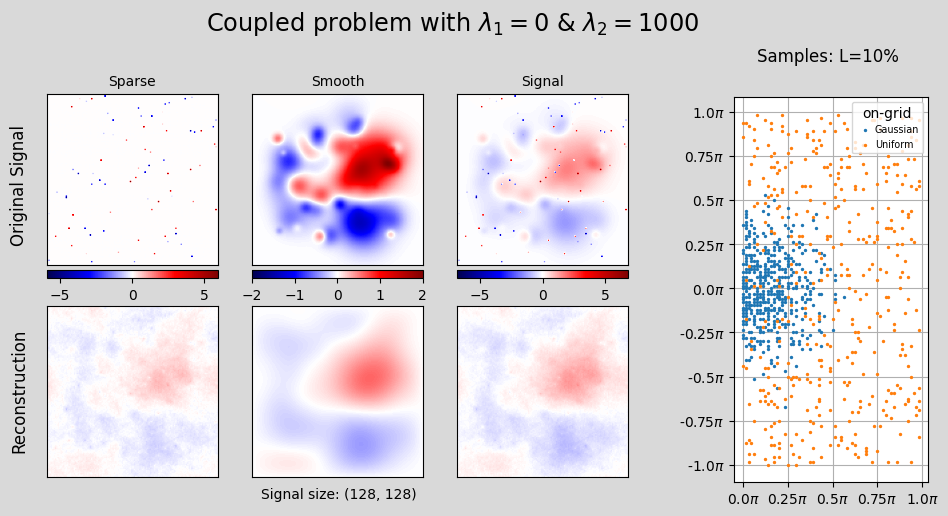

Button(description='SAVE', style=ButtonStyle())

Output()

In [12]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape(dim), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr)